# Real-ESRGAN Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn).

# 1. Preparations
For Google Colab
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment.

In [5]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
# !git clone https://github.com/xinntao/Real-ESRGAN.git
# %cd Real-ESRGAN

# If you already have a clone, just go to it
%cd ../../../Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
!python -m pip install torch==2.0.1 torchvision==0.15.2 --extra-index-url https://download.pytorch.org/whl/cu118

C:\Users\lamch\Repo\Real-ESRGAN
running develop
running egg_info
writing realesrgan.egg-info\PKG-INFO
writing dependency_links to realesrgan.egg-info\dependency_links.txt
writing requirements to realesrgan.egg-info\requires.txt
writing top-level names to realesrgan.egg-info\top_level.txt
reading manifest file 'realesrgan.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info\SOURCES.txt'
running build_ext
Creating c:\users\lamch\miniconda3\envs\ersgan\lib\site-packages\realesrgan.egg-link (link to .)
Removing realesrgan 0.3.0 from easy-install.pth file
realesrgan 0.3.0 is already the active version in easy-install.pth
detected new path 'c:\\users\\lamch\\repo\\so-upz\\deploy\\real-esrgan'

Installed c:\users\lamch\repo\real-esrgan
Processing dependencies for realesrgan==0.3.0
Searching for tqdm==4.66.5
Best match: tqdm 4.66.5
Adding tqdm 4.66.5 to easy-install.pth file
Installing tqdm-script.py script to C:

C:\Users\lamch\miniconda3\envs\ersgan\lib\site-packages\setuptools\__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
C:\Users\lamch\miniconda3\envs\ersgan\lib\site-packages\setuptools\command\develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for detail

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [6]:
import os
# from google.colab import files
import shutil

# Create the folders for input and output
upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
# uploaded = files.upload()
# for filename in uploaded.keys():
#   dst_path = os.path.join(upload_folder, filename)
#   print(f'move {filename} to {dst_path}')
#   shutil.move(filename, dst_path)

## Upload Files
Upload all files into the `/upload` folder

# 3. Inference


In [11]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 16
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore.

Testing 0 low-quality-image


C:\Users\lamch\miniconda3\envs\ersgan\lib\site-packages\torchvision\transforms\functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


# 4. Visualization

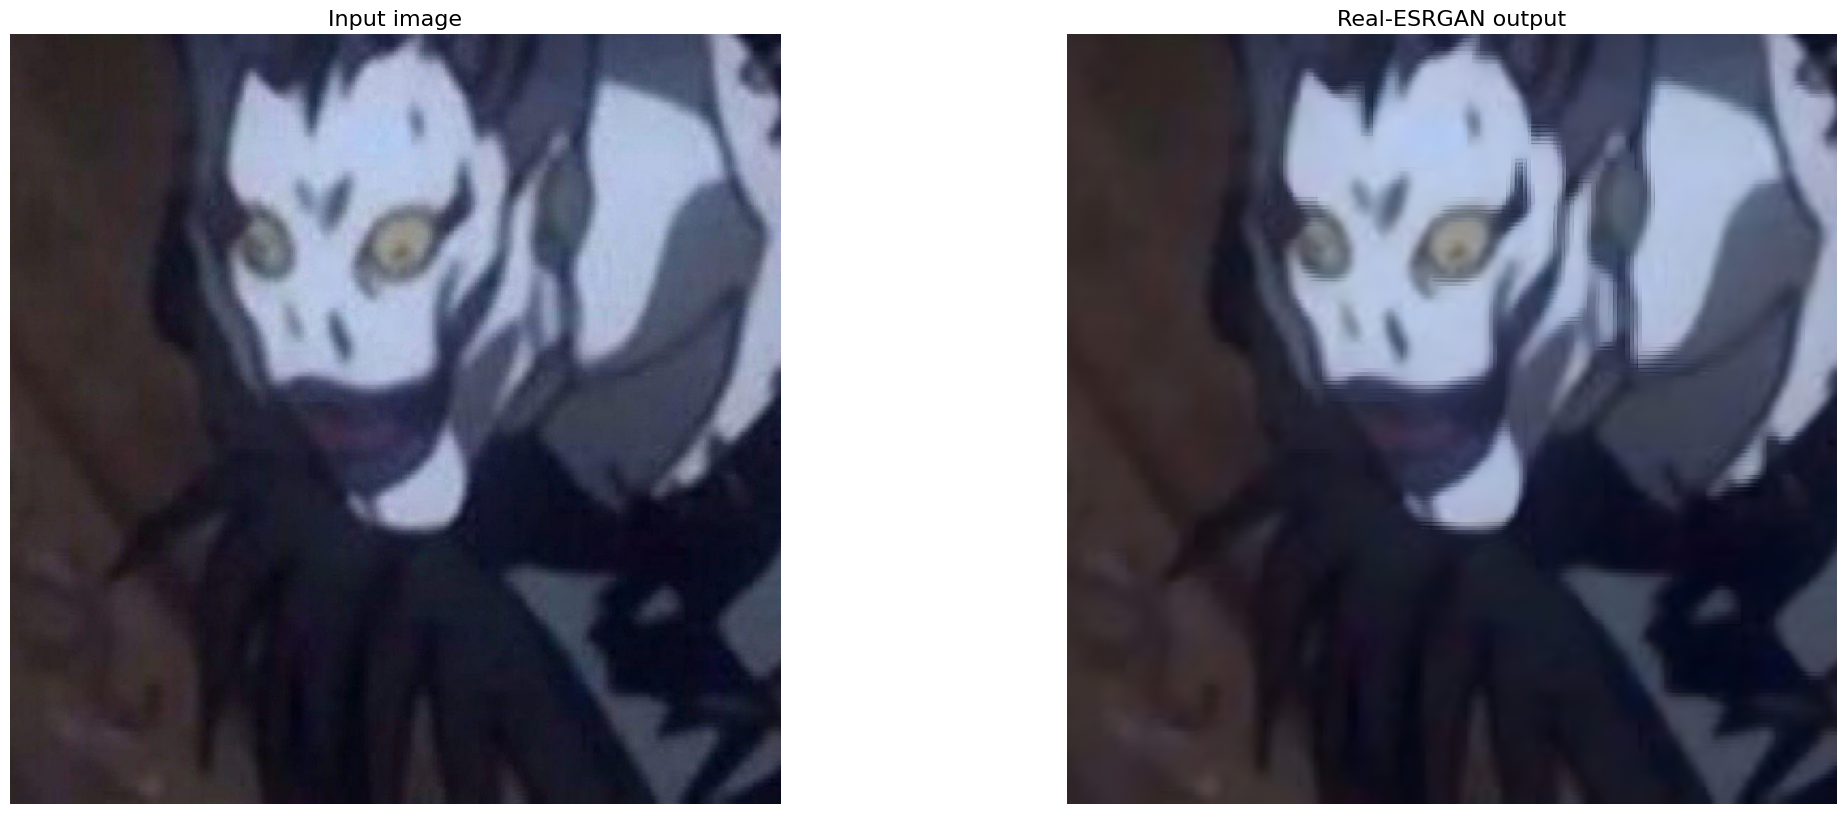

In [12]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [ ]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>